In [75]:
# 데이터 정렬 확인
p2 = [0.95, 0.79, 0.91, 0.95, 0.92, 0.86, 1.00, 0.94, 0.85, 0.89, 0.78, 0.98, 0.93, 1.05, 0.93, 1.06, 1.10, 0.97, 0.81, 0.96]
p3 = [62, 50, 53, 57, 40, 53, 55, 61, 59, 64, 50, 53, 64, 62, 50, 68, 52, 55, 57, 50, 55, 50, 56, 57, 46, 55, 53, 54, 52, 49, 47, 55, 57, 48, 63, 54, 55, 51, 53, 57, 53, 51, 50, 55, 63, 50, 56, 59]
p4 = [33.2, 41.8, 37.3, 40.2, 36.7, 39.1, 36.2, 36.0, 35.2, 36.7, 38.9, 35.8, 35.2, 40.1, 41.8]

print(len(p2),len(p3),len(p4))

p2.sort(reverse=False)
p3.sort(reverse=False)
p4.sort(reverse=False)

print(p2)
print(p3)
print(p4)


20 48 15
[0.78, 0.79, 0.81, 0.85, 0.86, 0.89, 0.91, 0.92, 0.93, 0.93, 0.94, 0.95, 0.95, 0.96, 0.97, 0.98, 1.0, 1.05, 1.06, 1.1]
[40, 46, 47, 48, 49, 50, 50, 50, 50, 50, 50, 50, 51, 51, 52, 52, 53, 53, 53, 53, 53, 53, 54, 54, 55, 55, 55, 55, 55, 55, 55, 56, 56, 57, 57, 57, 57, 57, 59, 59, 61, 62, 62, 63, 63, 64, 64, 68]
[33.2, 35.2, 35.2, 35.8, 36.0, 36.2, 36.7, 36.7, 37.3, 38.9, 39.1, 40.1, 40.2, 41.8, 41.8]


In [59]:
import scipy.stats as stats
from scipy.stats import norm
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd


#Problem_1: Assume that the helium porosity (in percentage) of coal samples taken from any particular seam is normally distributed with true standard deviation .75.


In [40]:
mu = 4.85
sigma = 0.75

#Problem 1_A
Compute a 95% confidence interval (CI) for the true average porosity of a certain seam if the average porosity for 20 specimens from the seam was 4.85.

In [41]:

n = 20
alpha = 0.05

population = norm(loc=mu, scale=sigma)
sample = population.rvs(size=n)
sample_mean = np.mean(sample)

rv = norm(loc=0, scale=1.0)

lower_bound, upper_bound = rv.ppf(alpha*0.5), rv.ppf(1-alpha*0.5)


print("Lower and upper bound: ", (lower_bound, upper_bound))
print("Confidence interval: ", (sample_mean + lower_bound*sigma/np.sqrt(n), sample_mean + upper_bound*sigma/np.sqrt(n)))

Lower and upper bound:  (-1.9599639845400545, 1.959963984540054)
Confidence interval:  (4.378298492365236, 5.035690397797672)


#Problem_1_B
Compute a 98% CI for true average porosity of another seam based on 16 specimens with a sample average porosity of 4.56.

In [42]:

n = 16
alpha = 0.02

population = norm(loc=mu, scale=sigma)
sample = population.rvs(size=n)
sample_mean = np.mean(sample)

rv = norm(loc=0, scale=1.0)

lower_bound, upper_bound = rv.ppf(alpha*0.5), rv.ppf(1-alpha*0.5)

print("Lower and upper bound: ", (lower_bound, upper_bound))
print("Confidence interval: ", (sample_mean + lower_bound*sigma/np.sqrt(n), sample_mean + upper_bound*sigma/np.sqrt(n)))

Lower and upper bound:  (-2.3263478740408408, 2.3263478740408408)
Confidence interval:  (4.586708346111078, 5.459088798876393)


#Problem_1_C
How large a sample size is necessary if the width of the 95% interval is to be .40?

In [58]:

confidence = 0.95 
interval_width = 0.40  

# Z
z_value = stats.norm.ppf((1 + confidence) / 2)

# calculate sample size
sample_size = math.ceil((z_value * sigma / (interval_width / 2))**2)

print("sample size: ", sample_size)

sample size:  55


#Problem_1_D
What sample size is necessary to estimate true average porosity to within .2 with 99% confidence?

In [57]:

confidence = 0.99
interval_width = 0.20  

# Z
z_value = stats.norm.ppf((1 + confidence) / 2)

# calculate sample size
sample_size = math.ceil((z_value * sigma / (interval_width / 2))**2)

print("sample size: ", sample_size)

sample size:  374


#Problem_2
A study of the ability of individuals to walk in a straight line  reported the accompanying data on cadence (strides per second) for a sample of n = 20 randomly selected healthy men. A normal probability plot gives substantial support to the assumption that the population distribution of cadence is approximately normal.

In [45]:
sample_data = [0.95, 0.79, 0.91, 0.95, 0.92, 0.86, 1.00, 0.94, 0.85, 0.89, 0.78, 0.98, 0.93, 1.05, 0.93, 1.06, 1.10, 0.97, 0.81, 0.96]

#Problem_2_A
Plot a normal probability plot in order to confirm that the population distribution is approximately normal.

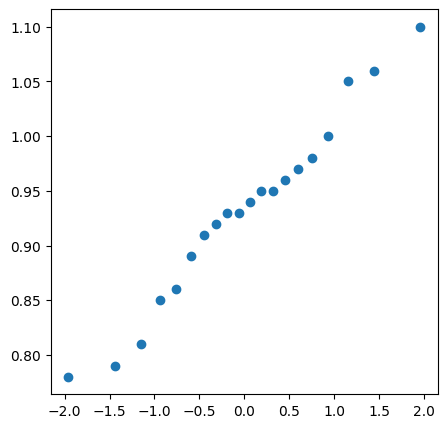

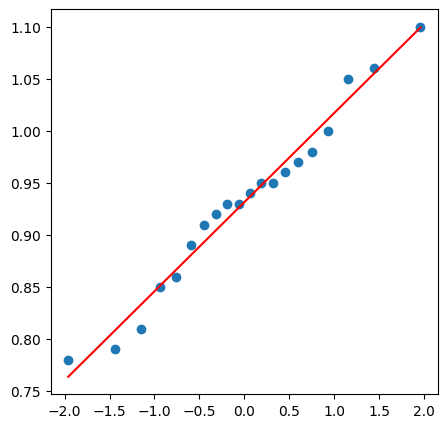

In [61]:

sample_sorted = np.sort(sample_data)
n = len(sample_sorted)
idx = np.arange(1, 1+len(sample_sorted), 1)
sample_percent = (idx-0.5)/n

z = norm(loc=0, scale=1.0)
percentiles = z.ppf(sample_percent)

fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.plot(percentiles, sample_sorted, marker="o", lw=0)

plt.show()


# curve_fit

def func(x, a, b):
    return a*x+b

popt, pcov = curve_fit(func, percentiles, sample_sorted)

y_fitted = func(percentiles, popt[0], popt[1])

fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.plot(percentiles, sample_sorted, marker="o", lw=0) 
ax.plot(percentiles, y_fitted, color="red") 

plt.show()

#Problem_2_B
Calculate and interpret a 95% confidence interval for population mean cadence.

In [64]:

confidence = 0.95
alpha = 0.05
z_value = stats.norm.ppf((1 + confidence) / 2)
n = len(sample_sorted)

sample_mean = np.mean(sample_data)

rv = norm(loc=0, scale=1.0)

lower_bound, upper_bound = rv.ppf(alpha*0.5), rv.ppf(1-alpha*0.5)

print("Lower and upper bound: ", (lower_bound, upper_bound))
print("Confidence interval: ", (sample_mean + lower_bound*sigma/np.sqrt(n), sample_mean + upper_bound*sigma/np.sqrt(n)))

Lower and upper bound:  (-1.9599639845400545, 1.959963984540054)
Confidence interval:  (0.6028040472837819, 1.260195952716218)


#Problem_3
The alternating current (AC) breakdown voltage of an insulating liquid indicates its dielectric strength. The article “Testing Practices for the AC Breakdown Voltage Testing of Insulation Liquids” gave the accompanying sample observations on breakdown voltage (kV) of a particular circuit under certain conditions.


In [70]:
sample_data = [62, 50, 53, 57, 40, 53, 55, 61, 59, 64, 50, 53, 64, 62, 50, 68, 52, 55, 57, 50, 55, 50, 56, 57, 46, 55, 53, 54, 52, 49, 47, 55, 57, 48, 63, 54, 55, 51, 53, 57, 53, 51, 50, 55, 63, 50, 56, 59]

#Problem_3_A
Construct a boxplot of the data to find out possible outliers. Use the Tukey’s fence criterion for outliers.

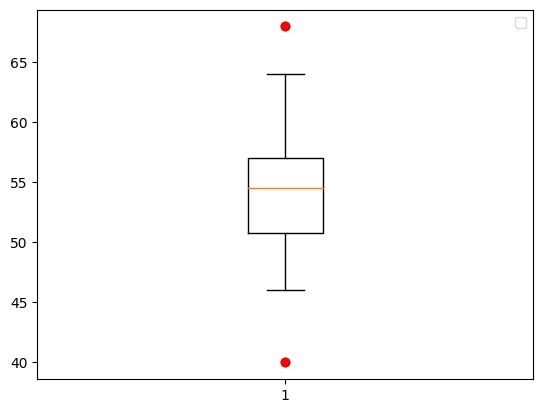

In [72]:
q1 = np.percentile(sample_data, 25)
q3 = np.percentile(sample_data, 75)
iqr = q3 - q1
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr

outliers = [x for x in sample_data if x < lower_fence or x > upper_fence]

plt.boxplot(sample_data)

plt.plot(np.ones(len(outliers)), outliers, 'ro')
plt.legend()
plt.show()

<Axes: >

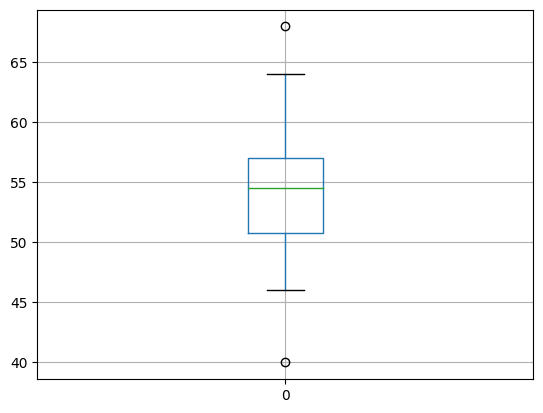

In [74]:

df = pd.DataFrame(data=sample_data)
df.boxplot()

#Problem_3_B
Calculate and interpret a 95% confidence interval (CI) for true average breakdown voltage m.



In [76]:

confidence = 0.95
alpha = 0.05
z_value = stats.norm.ppf((1 + confidence) / 2)
n = len(sample_sorted)

sample_mean = np.mean(sample_data)

rv = norm(loc=0, scale=1.0)

lower_bound, upper_bound = rv.ppf(alpha*0.5), rv.ppf(1-alpha*0.5)

print("Lower and upper bound: ", (lower_bound, upper_bound))
print("Confidence interval: ", (sample_mean + lower_bound*sigma/np.sqrt(n), sample_mean + upper_bound*sigma/np.sqrt(n)))

Lower and upper bound:  (-1.9599639845400545, 1.959963984540054)
Confidence interval:  (54.23380404728378, 54.89119595271622)


#Problem_3_C
Suppose the investigator believes that virtually all values of breakdown voltage are between 40 and 70. What sample size would be appropriate for the 95% CI to have a width of 2 kV?

In [69]:

confidence = 0.92
interval_width = 2  
min_value = 40  
max_value = 70  

z_value = stats.norm.ppf((1 + confidence) / 2)

standard_deviation = interval_width / (2*z_value)

sample_size = ((max_value - min_value) / (2 * standard_deviation / np.sqrt(3))) ** 2

print("sample size: ", sample_size)

sample size:  2068.8086610515393


#Problem_4
The article “Concrete Pressure on Formwork” (Mag. of Concrete Res., 2009: 407–417) gave the following observations on maximum concrete pressure (kN/m2)

In [77]:
sample_data = [33.2, 41.8, 37.3, 40.2, 36.7, 39.1, 36.2, 36.0, 35.2, 36.7, 38.9, 35.8, 35.2, 40.1, 41.8]

#Problem_4_A
Is it plausible that this sample was selected from a normal population distribution?



: 일반적으로 p_value가 0.05 이상이면 정규 분포를 가정할 수 있기 때문에 이는 정규분포를 따랐다고 볼 수 있다.

In [82]:
statistic, p_value = stats.shapiro(sample_data)

print("Shapiro-Wilk test p-value:", p_value)

Shapiro-Wilk test p-value: 0.43871933221817017


#Problem_4_B
Calculate the confidence interval with confidence level 95% for the population standard deviation of maximum pressure.

In [83]:
confidence = 0.95
alpha = 0.05
z_value = stats.norm.ppf((1 + confidence) / 2)
n = len(sample_sorted)

sample_mean = np.mean(sample_data)

rv = norm(loc=0, scale=1.0)

lower_bound, upper_bound = rv.ppf(alpha*0.5), rv.ppf(1-alpha*0.5)

print("Lower and upper bound: ", (lower_bound, upper_bound))
print("Confidence interval: ", (sample_mean + lower_bound*sigma/np.sqrt(n), sample_mean + upper_bound*sigma/np.sqrt(n)))

Lower and upper bound:  (-1.9599639845400545, 1.959963984540054)
Confidence interval:  (37.28463738061711, 37.94202928604955)


# comment

1. 이 문제는 sample = population.rvs(size=n)를 이용하여 직접 sampling을 하는 문제가 아닙니다. 문제에 sample mean이 주어져 있습니다. 주어진 sample mean으로 구간추정을 하는 것입니다. 그래서 추정하신 구간값이 틀립니다. (-2)

2.  sample std를 계산하지 않으셨습니다. np.std과 ddof=1 옵션을 사용하여 sample std를 직접 계산하셔야 합니다. (-1)

3. B: 2번과 마찬가지로 sample std를 계산하지 않으셨습니다. (-1)
3. C: 샘플사이즈가 많이 다릅니다. 100~110정도가 나와야 합니다. (-1)

4. 수업시간에 다루지 않은 Shapiro test를 하셨네요. 이 문제는 population variance의 구간을 추정하는 문제입니다. population mean의 구간을 추정하셨네요. 
